<a href="https://colab.research.google.com/github/abel-keya/machine_learning-_supervised_learning_with_python/blob/master/draft1_week_7_IP_Abel_Keya_hass_consulting__company_with_quantile_and__regularization_based_regression_techniques_with_python_Copy1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning: Hass Consulting Company  real estate regression analysis with quantile and Regularization techniques 

## 1. Defining the Question

In [0]:
As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. [dataset](http://bit.ly/IndependentProjectWeek7Dataset) description is as follows:
## Data Features
* Id 
* price  - Price of the house
* bedrooms - Number of Bedrooms
* bathrooms - Number of Bathrooms
* sqft_living - Square feet area of living area
* sqft_lot  - Square feet area of parking Layout
* floors - Number of Floors
* waterfront - Whether waterfront is there or not
* view - Number of Views
* grade - Grades
* sqft_above
* sqft_basement - Square feet area off basement
* yr_built - Year the house is built
* yr_renovated - Year the house is renovated
* zipcode - zipcode os the house
* lat : Latitude of the house
* lon : Longitude of the house
* sqft_living15
* sqft_lot15

## a) Specifying the Question

 A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly  by applying Polynomial and Logistic regression.Given a dataset of FIFA rankings.

## b) Defining the Metric for Success
* Clean dataset
* Multiple Linear Regression model
* Quantile Regression model
* Ridge Regression model
* Lasso Regression model
* Elastic Net Regression model

# c) Understanding the context 

####  perform modeling using the given regression techniques then evaluate their performance. 
#### provide  observations and recommendation on the suitability of each of the tested models on their appropriateness of solving the given problem. 

* Multiple Linear Regression
* Quantile Regression
* Ridge Regression
* Lasso Regression
* Elastic Net Regression
### Required to perform each of the following:
* Find and deal with outliers, anomalies, and missing data within the dataset.
* Perform univariate, bivariate and multivariate analysis recording your observations.
* Performing regression analysis.
* Incorporate categorical independent variables into your models.
* Check for multicollinearity
* Provide a recommendation based on your analysis. 
* Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
* Challenge your solution by providing insights on how you can make improvements in model improvement.

## d) Recording the Experimental Design
* Data preparation
* Data analysis
* Data modeling

## e) Data Relevance
The data was appropriate for the regression analysis that was needed.

# 2. Reading the Data

In [0]:
# Loading libraries
import numpy as np
import pandas as pd
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [0]:
# Loading the Dataset
hass=pd.read_csv('Independent Project Week 7 - house_data.csv')
hass

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## 3. Checking the Data

In [0]:
# Determining the no. of records in our dataset
hass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
id               21613 non-null int64
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15)
memory usage: 3.3 MB


In [0]:
# Previewing the top of our dataset
hass.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
# Previewing the bottom of our dataset
hass.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [0]:
# Checking whether each column has an appropriate datatype
hass.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [0]:
hass['yr_built'].count

<bound method Series.count of 0        1955
1        1951
2        1933
3        1965
4        1987
         ... 
21608    2009
21609    2014
21610    2009
21611    2004
21612    2008
Name: yr_built, Length: 21613, dtype: int64>

In [0]:
hass['yr_renovated'].sample(10).count

<bound method Series.count of 18740    0
3669     0
6979     0
17062    0
20387    0
14605    0
892      0
16508    0
13103    0
3941     0
Name: yr_renovated, dtype: int64>

## 4. External Data Source Validation

### a.Validation
The data was validated against datasets at [Residential Property Price indicators](https://data.opendatasoft.com/explore/dataset/residential-property-price-indicators%40public/table/?disjunctive.country&disjunctive.indicator_name&sort=date)

## 5. Tidying the Dataset

In [0]:
#checking the shape of teams dataset
hass.shape

(21613, 20)

In [0]:
#description of numeric data columns
hass.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [0]:
#determining the tatol records per column
hass.count()

id               21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

In [0]:
# Checking for Outliers

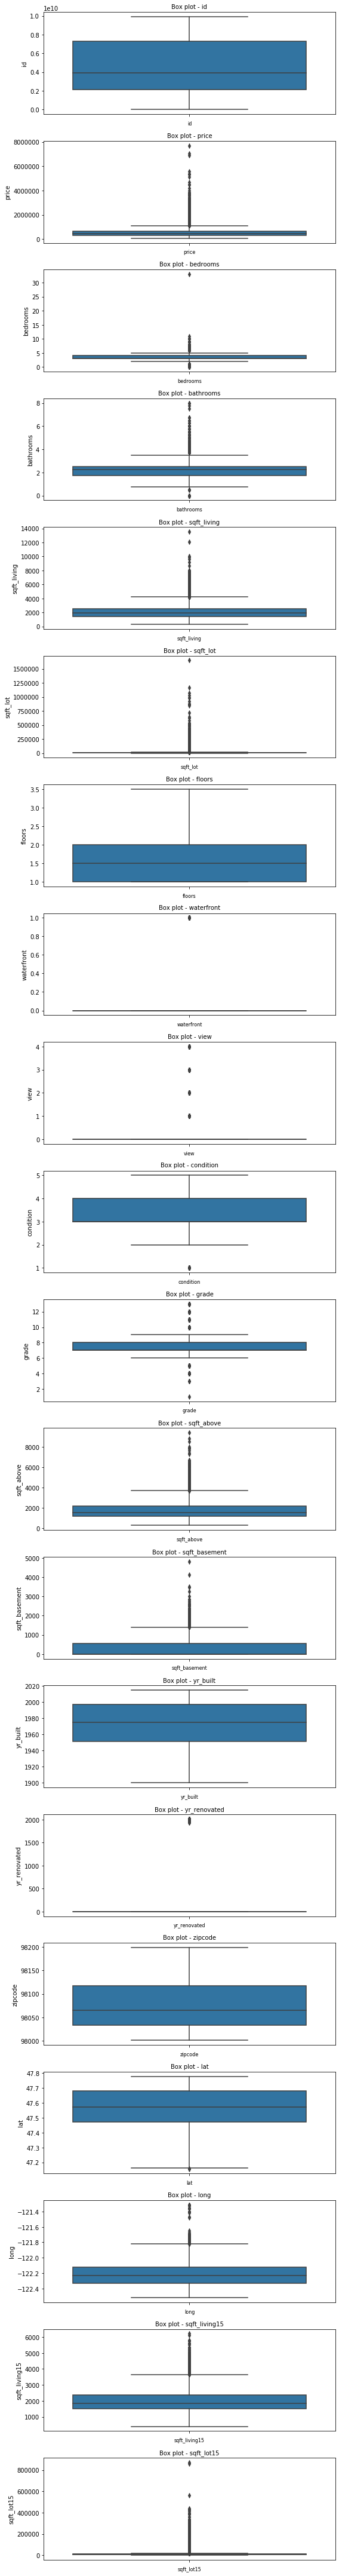

In [0]:
#checking for outliers in the dataset
col_names = numeric_clmns = hass.dtypes[hass.dtypes != "object" ].index

fig, ax = plt.subplots(len(col_names), figsize=(8,60))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=hass[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.tight_layout()
plt.show()

In [0]:
# Checking for Anomalies


In [0]:
# Identifying the Missing Data
hass.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [0]:
# More data cleaning procedures


1.converting the date and rank_date into date type

In [0]:
#confirmation of datatype
hass.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

3.removing whitespace from column names

In [0]:
# replace spaces in the data set column names
hass.rename(columns=lambda x: x.strip().replace(" ", ""), inplace=True)
# confirm changes
hass.head(1)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


4.Categorical variable encoding

In [0]:
#create a copy of the data
housing_data=hass.copy()

In [0]:
#preview the to of the data
housing_data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
#list of columns
housing_data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:
#random sampling to confirm the dataset changes
housing_data.sample(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2254,1922000070,1340000.0,4,2.50,4250,19387,2.0,0,2,4,9,3260,990,1972,0,98040,47.5578,-122.212,3690,17024
12388,3935900232,207000.0,3,1.00,920,5546,1.0,0,0,2,6,920,0,1928,0,98125,47.7114,-122.284,1300,5546
12354,9286100200,450000.0,3,2.50,1670,2589,2.0,0,0,3,8,1670,0,2000,0,98027,47.5314,-122.047,1670,2897
18370,2781250230,343000.0,4,2.50,2070,4500,2.0,0,0,3,7,2070,0,2004,0,98038,47.3497,-122.026,2760,5173
20319,255450380,324747.0,3,2.50,2060,4742,2.0,0,0,3,8,2060,0,2014,0,98038,47.3706,-122.017,2370,4725
6062,5379805253,240000.0,2,1.00,870,8400,1.0,0,0,3,7,870,0,1960,0,98188,47.4493,-122.282,1070,12465
13979,6076500220,400000.0,3,2.25,1180,14258,2.0,0,0,3,7,1180,0,1987,0,98034,47.7112,-122.238,1860,10390
11294,4058802255,219950.0,2,1.00,990,6448,1.0,0,0,3,7,990,0,1948,0,98178,47.5031,-122.245,1130,7200
10736,7327500200,455000.0,3,1.75,1180,14292,1.0,0,0,3,7,1180,0,1981,0,98045,47.4818,-121.733,1480,14400
8012,2206700215,550000.0,4,2.00,2070,9822,1.0,0,0,5,7,2070,0,1955,0,98006,47.5660,-122.140,1300,9572


# 6. Exploratory Analysis

In [0]:
# Ploting the univariate summaries and recording our observations

# 1. Distribution plots for the Variables

In [0]:
housing_data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

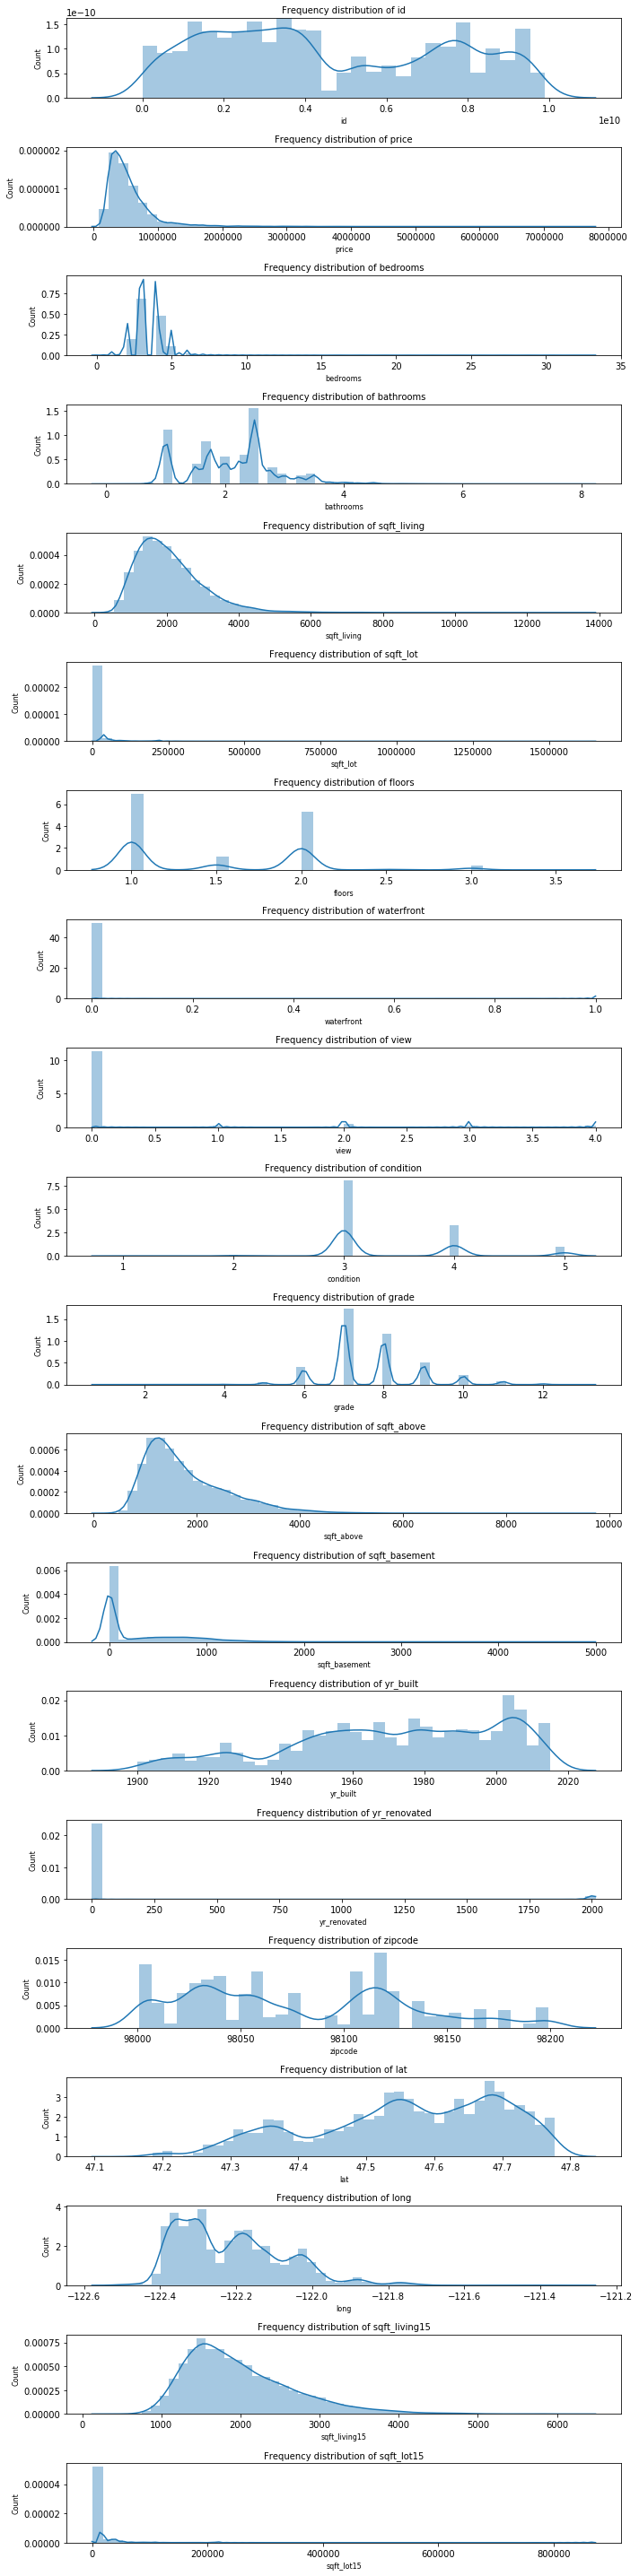

In [0]:
#importing the warnings library
import warnings
warnings.filterwarnings('ignore')
# Plotting distribution of numerical variables
col_names = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
fig, ax = plt.subplots(len(col_names), figsize=(10,40))

for i, col_val in enumerate(col_names):

    sns.distplot(housing_data[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.tight_layout()
plt.show();

# 2. Correlation matrix for the variables

<function matplotlib.pyplot.show(*args, **kw)>

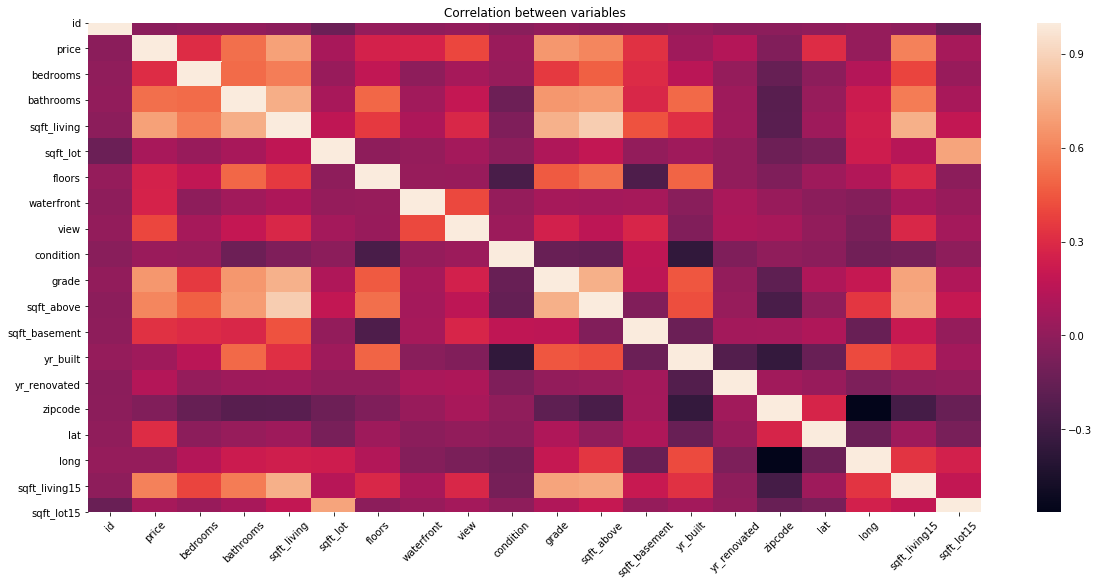

In [0]:
#heatmap
#checking for correlation using spearman method
plt.figure(figsize=(20,9))
sns.heatmap(housing_data.corr())
plt.xticks( rotation=45)
plt.title('Correlation between variables')
plt.show

In [0]:
#Pairplot Data Visualization
#sns.pairplot(housing_data, diag_kind ='kde',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},size = 4)

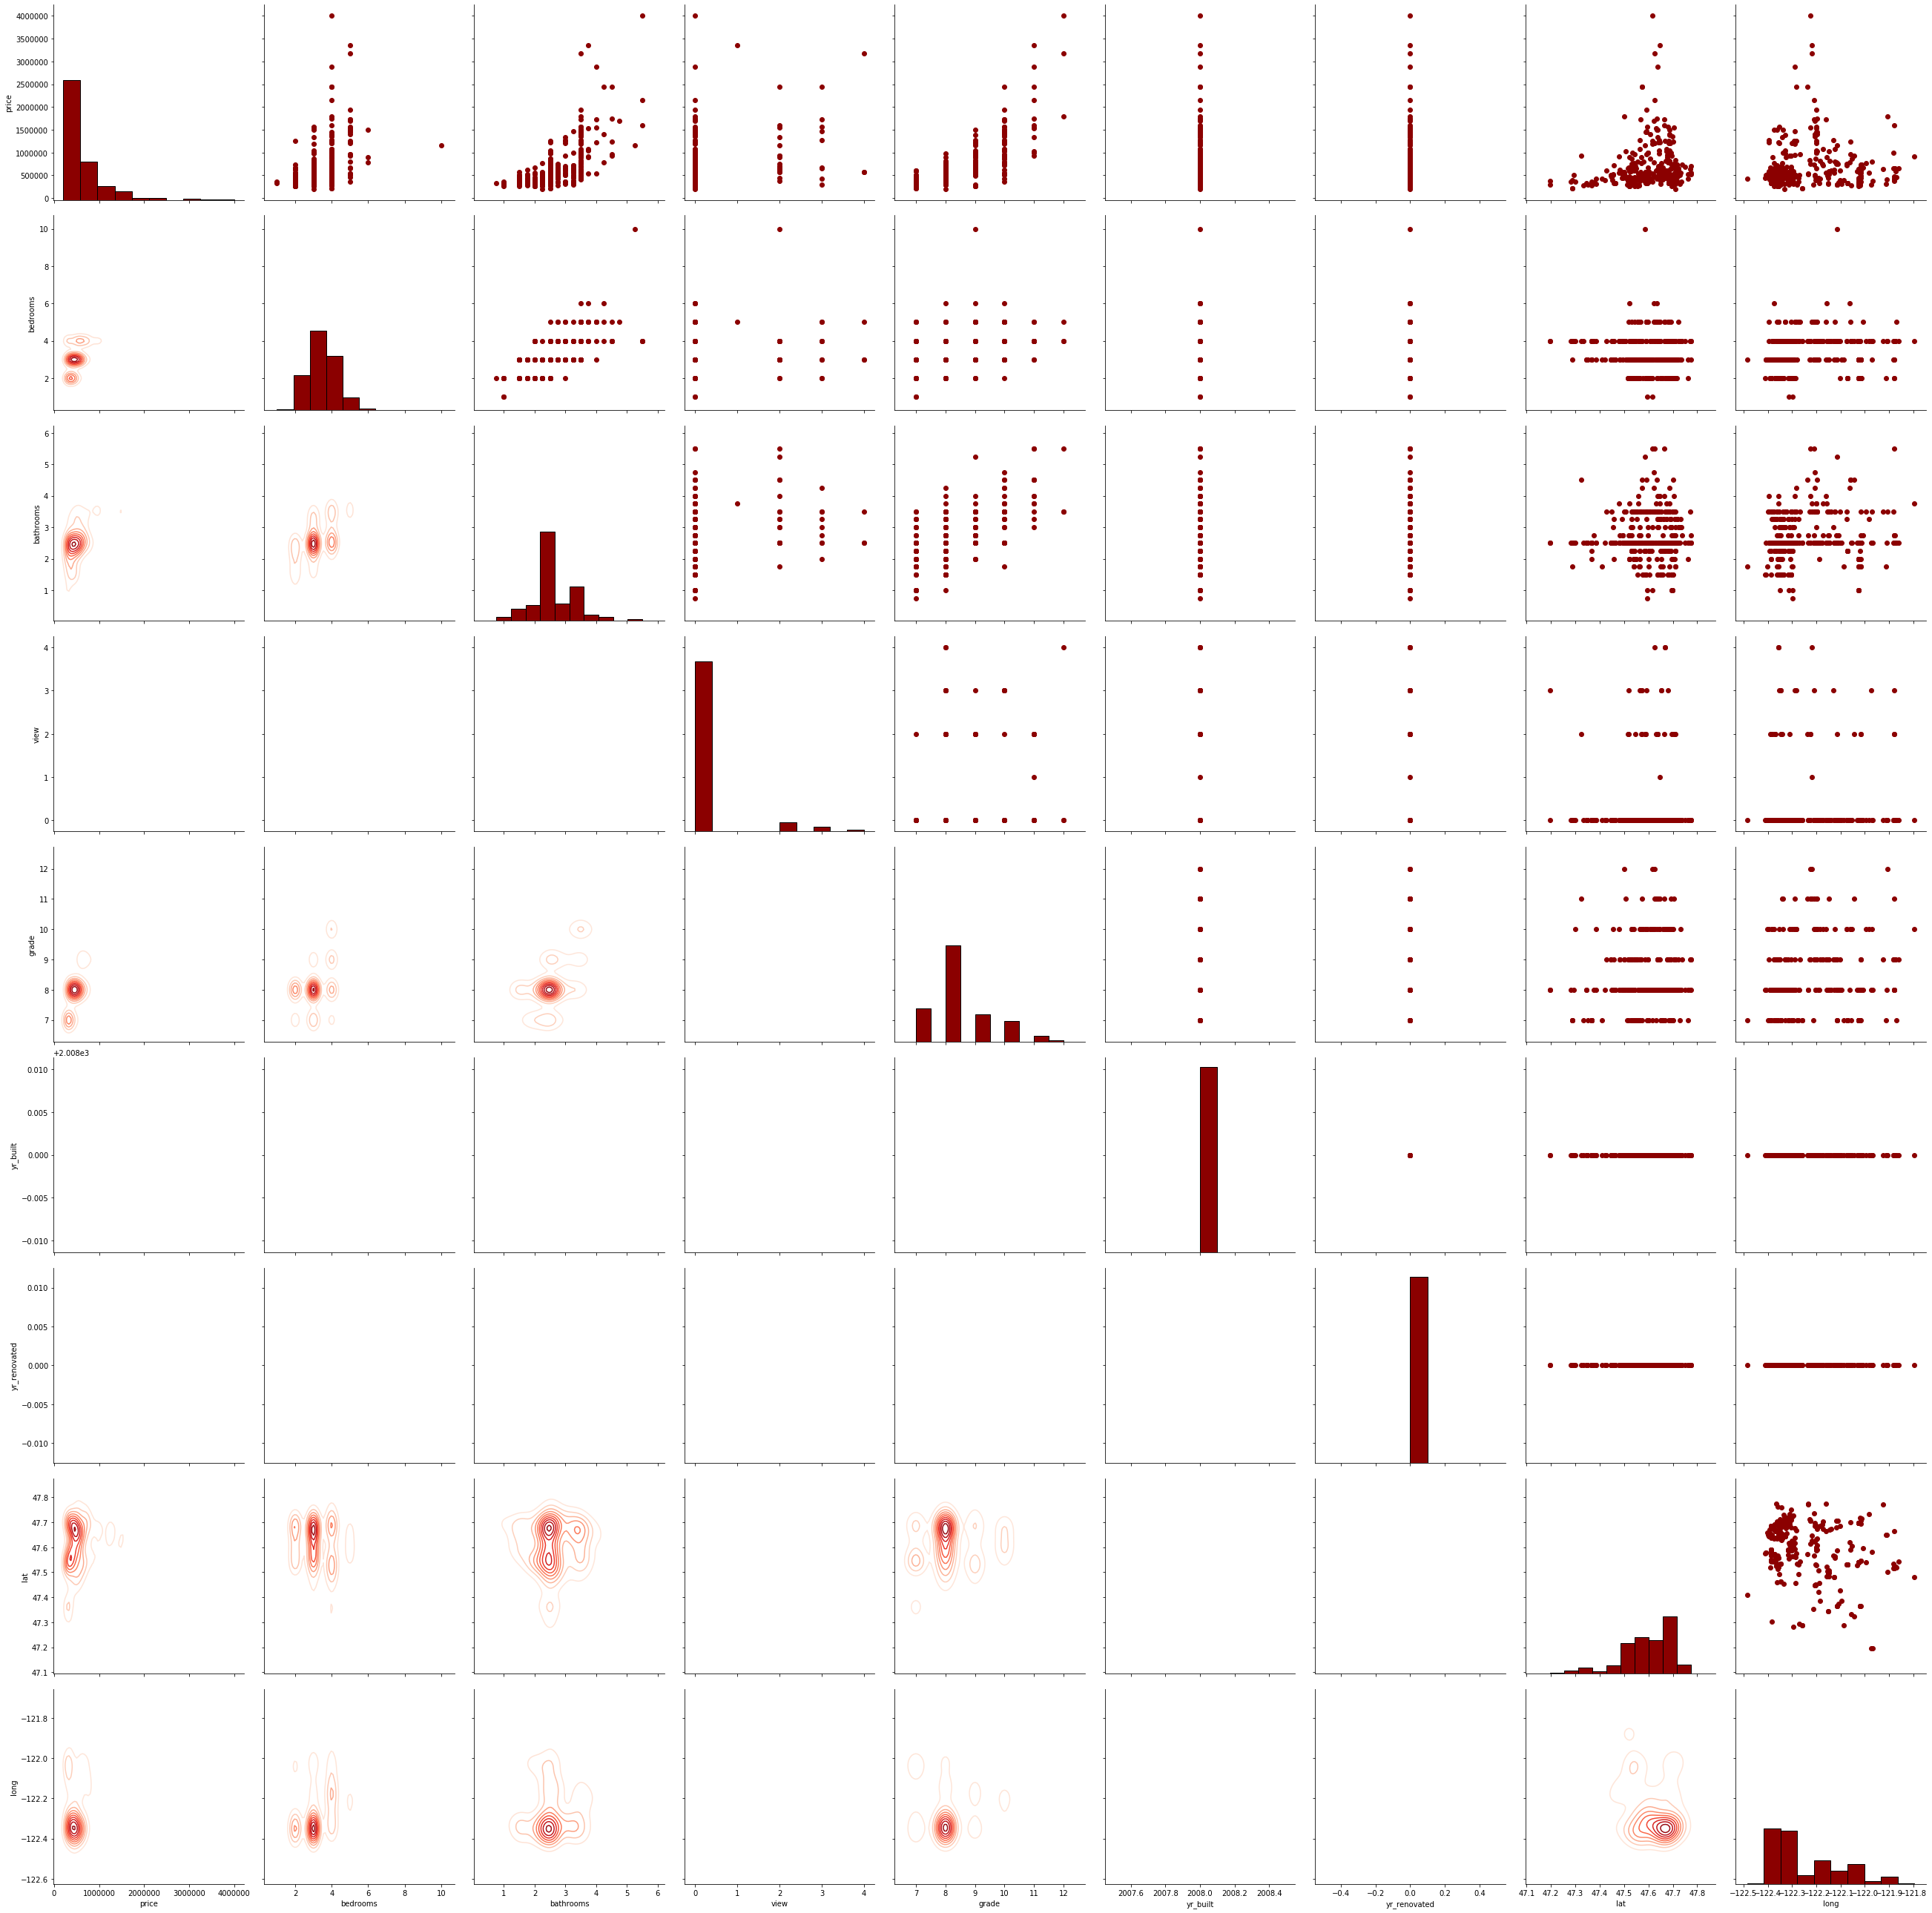

In [0]:
# Create an instance of the PairGrid class.
grid = sns.PairGrid(data= housing_data[housing_data['yr_built'] == 2008],vars = ['price', 'bedrooms', 'bathrooms','view','grade', 
        'yr_built', 'yr_renovated', 'lat', 'long'
       ], size = 4)
# Map a scatter plot to the upper triangle
grid = grid.map_upper(plt.scatter, color = 'darkred')
# Map a histogram to the diagonal
grid = grid.map_diag(plt.hist, bins = 10, color = 'darkred',edgecolor = 'k')
# Map a density plot to the lower triangle
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')

Text(0, 0.5, 'price')

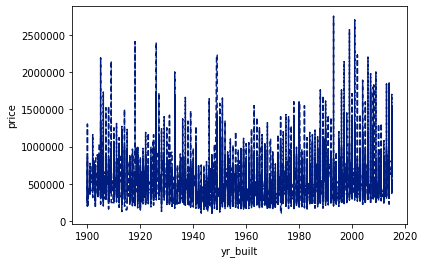

In [0]:
# compute statistics in a rolling window

df_window = housing_data.sort_values('yr_built').rolling(5)
x_winmean = df_window.mean()['yr_built']
y_median = df_window.median()['price']
y_q1 = df_window.quantile(.25)['price']
y_q3 = df_window.quantile(.75)['price']

# plot the summarized data
base_color = sns.color_palette()[0]
line_color = sns.color_palette('dark')[0]
#lt.scatter(data = teams_data, x = 'home_score', y = 'home_team')
plt.errorbar(x = x_winmean, y = y_median, c = line_color)
plt.errorbar(x = x_winmean, y = y_q1, c = line_color, linestyle = '--')
plt.errorbar(x = x_winmean, y = y_q3, c = line_color, linestyle = '--')

plt.xlabel('yr_built')
plt.ylabel('price')

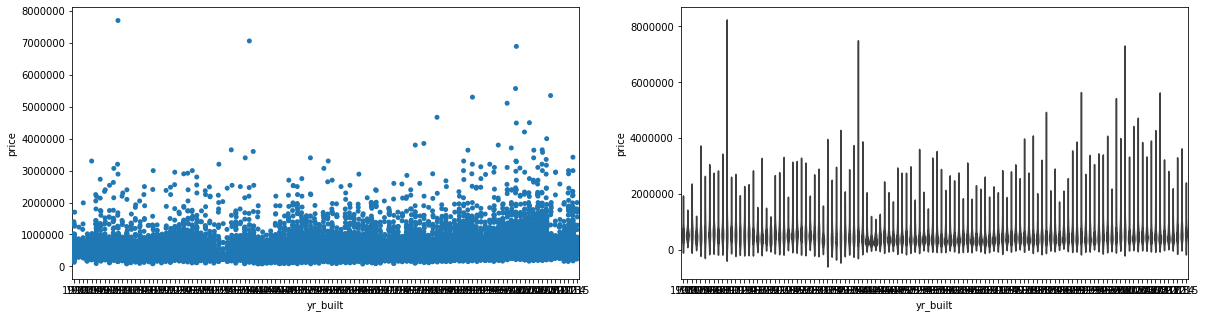

In [0]:

plt.figure(figsize = [20, 5])
base_color = sns.color_palette()[0]

# left plot: strip plot
plt.subplot(1, 2, 1)
ax1 = sns.stripplot(data = housing_data, x = 'yr_built', y = 'price',
                   color = base_color)

# right plot: violin plot with inner strip plot as lines
plt.subplot(1, 2, 2)
sns.violinplot(data = housing_data, x = 'yr_built', y = 'price', color = base_color,
             inner = 'stick')

<function matplotlib.pyplot.show(*args, **kw)>

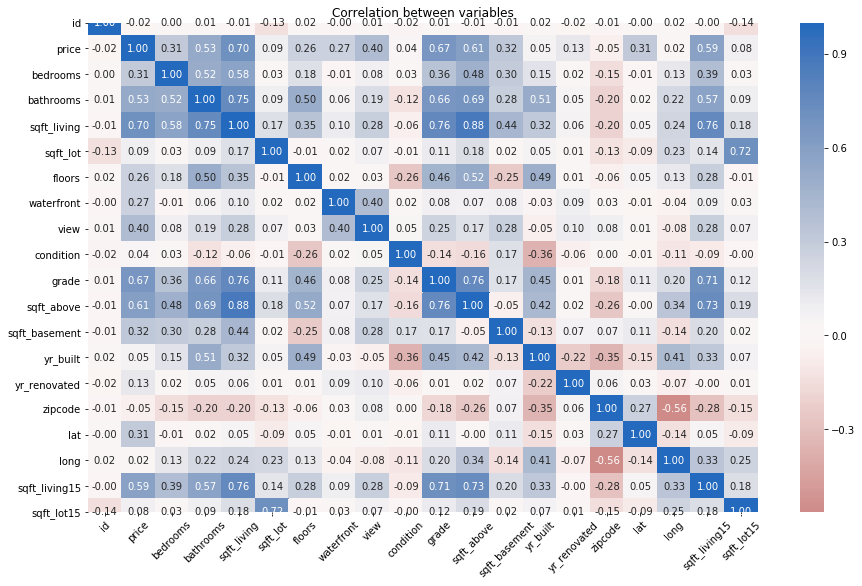

In [0]:
plt.figure(figsize=(15,9))
sns.heatmap(housing_data.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
#correlation_matrix=teams_data.corr(method = 'spearman')
#sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns, annot = True)
plt.xticks( rotation=45)
plt.title('Correlation between variables')
plt.show

In [0]:
g = sns.PairGrid(data = housing_data,x_vars= ['yr_built','price', 'bedrooms', 'bathrooms','view','grade', 
        'yr_built', 'yr_renovated', 'lat', 'long'],
                 y_vars =[ 'price']  )
g.map(sns.violinplot, inner = 'quartile')

# Observations from the univariate plots 

 ###  1.Distribution
* the attributes home_team,away_team,home_score,away_score,tournament,city,country,rank_change,confederation,matchday, matchweek,matchmonth.
* nomarl distribution-matchyear,rankyear,matchmonth,matchweek have an almost perfect nomarl distribution
* matchday,confederation,tournament,rankchange have multimodal distribution
* bimodal distribution- homewin,drawn, awaywin and neutral have bimodal distribution

###  2.Skewness 
* matchyear is left skewed while previous points,awayscore and homescore are right skewed

###  3.Correlation
From the heatmap there is moderate corerelation between:
* hometeam-country
* homescore-homewin.
* homescore-awaywin
* matchyear-previouspoints

proceeding  to build polynomial and logistic model to obtain the scores against against the given dataframe.

# 7. Implementing the Solution

# **Detecting multicollinearity**

In [0]:
# correlations between the variables
correlations = housing_data.corr()
correlations

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016797,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016797,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456
bedrooms,0.001286,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


# VIF score to detect multicollinearity for the dataset

In [0]:
#dataframe with the inverse of the correlations matrix for housing data
#use these correlations to compute the VIF score for each variable
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.028542,0.033760,0.002267,-0.005352,9.177994e-03,0.077219,-0.011600,0.002765,-0.037849,0.022078,-0.048373,1.034401e-02,-1.095702e-02,0.023615,0.017859,0.000315,0.007458,-0.072914,0.009239,0.105511
price,0.033760,3.331694,0.301926,-0.287621,-1.050102e+00,-0.045685,-0.033158,-0.457218,-0.369007,-0.155106,-1.024505,-4.065969e-01,-9.555789e-02,0.699138,-0.071608,0.282609,-0.757054,0.272064,-0.134388,0.098140
bedrooms,0.002267,0.301926,1.679425,-0.487234,-2.900396e-01,0.045161,0.046698,0.021795,0.080697,-0.064841,0.214235,-7.347922e-01,-3.976669e-01,0.197843,0.038950,0.105724,-0.017829,0.042108,0.013026,0.094213
bathrooms,-0.005352,-0.287621,-0.487234,3.375628,-4.970782e+00,-0.020368,-0.672186,0.049214,-0.009708,-0.123686,-0.179471,3.324971e+00,1.367340e+00,-0.996174,-0.253644,0.017405,0.024363,0.030747,0.103709,0.062751
sqft_living,0.009369,-1.055273,-0.295559,-4.967894,-3.376439e+13,-0.107006,0.533353,0.595449,-0.478546,-0.315441,-0.469748,3.044288e+13,1.627026e+13,1.438921,0.087349,-0.235272,0.260417,-0.210221,-0.931390,-0.213771
sqft_lot,0.077219,-0.045685,0.045161,-0.020368,-1.063475e-01,2.109017,0.044866,0.034139,-0.056515,0.034475,-0.042674,-8.220105e-02,1.723483e-02,0.090425,0.023829,-0.006678,0.064889,-0.142610,0.166587,-1.452768
floors,-0.011600,-0.033158,0.046698,-0.672186,5.295155e-01,0.044866,2.012361,-0.000812,-0.036580,0.090957,-0.220239,-9.677517e-01,3.687442e-01,-0.488619,-0.080094,-0.173551,-0.120268,0.162189,0.273838,0.070537
waterfront,0.002765,-0.457218,0.021795,0.049214,5.957325e-01,0.034139,-0.000812,1.266565,-0.442151,0.008786,0.189562,-4.621320e-01,-2.079280e-01,-0.116876,-0.055442,-0.016250,0.113898,-0.010443,0.072970,-0.031186
view,-0.037849,-0.369007,0.080697,-0.009708,-4.770846e-01,-0.056515,-0.036580,-0.442151,1.477161,-0.005080,-0.070505,6.188061e-01,3.978259e-02,0.073637,-0.032922,-0.171895,0.201833,0.043886,-0.311082,-0.021830
condition,0.022078,-0.155106,-0.064841,-0.123686,-3.159314e-01,0.034475,0.090957,0.008786,-0.005080,1.257240,-0.007632,4.042105e-01,8.256495e-02,0.529381,0.210433,0.148053,0.099266,-0.021435,0.082361,-0.030419


####  rankyear,martchyear,matchmonth,matchweek,matchday have VIF greater than 5 ranging between 8-41

# **Residual plots and heteroskedasticity testing**

In [0]:
housing_data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:
data=housing_data[['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]
data.head(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# obtaining the residuals for the model 1 data using Linear regression

In [0]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data.drop(['price'],axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for admission based on our model
y_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset
residuals = np.subtract(y_predict, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

,price
count,4.323000e+03
mean,4.544492e+03
std,1.904908e+05
min,-3.207548e+06
25%,-7.229705e+04
50%,1.199283e+04
75%,1.012643e+05
max,1.033708e+06


In [0]:
residuals.mean()

4544.491901147219

means values between 0 and 1.(0-100%) model gives 0.017235(1.7%)


# Residual plot 1

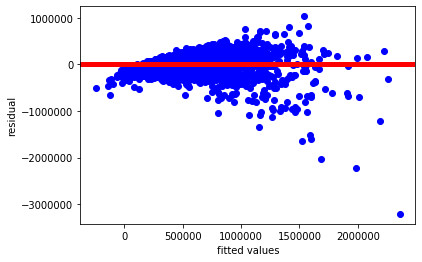

In [0]:
import matplotlib.pyplot as plt
plt.scatter(y_predict, residuals, color='blue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=5)
plt.show()

#### residual plots forms funnel shape

# **performing a heteroskedasticity test using bartlett's test.**

-Null Hypothsis:
**The variance is equal for all our datapoints**

-Alternative Hypothesis:
**The variance is different for at least one pair of datapoints.**

In [0]:
#importing the library
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

#  compute a critical value of the chi squared distribution which helps to interpret the results 
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

# If the test_result is greater than the critical value, then the null hypothesis rejected. 
#This would mean that there are patterns to the variance of the data

# the null hypothesis that the variance is homogeneous across the data is accepted

if (test_result > critical_value):
  print('The variances are unequal, and the model should be reassessed')
else:
  print('The variances are homogeneous!')

1.0947746545285952e-189
The variances are homogeneous!


In [0]:
# Implementing the Solution using the models

In [0]:
#data for model 2
X = data.drop(['price'],axis=1)
y = data[['price']]
X.shape,y.shape

((21613, 19), (21613, 1))

In [0]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

LinearRegression()

In [0]:
#Fitting the Linear Regression to the dataset  
from sklearn.linear_model import LinearRegression  
lreg= LinearRegression()  
lreg.fit(X,y) 

LinearRegression()

In [0]:
from pandas import Series, DataFrame
print('--------Trainig Linear Regression Model---------------')
lreg = LinearRegression()
#training the model
lreg.fit(X_train,y_train)

#predicting on cv
pred = lreg.predict(X_train)

#calculating mse
mse = np.mean((pred - X_train)**2)
print('\nMean Sqaured Error are:\n ', mse )

#Let us take a look at the coefficients of this linear regression model.
# calculating coefficients
#coeff = DataFrame(X.columns)

#coeff['Coefficient Estimate'] = Series(lreg.coef_)

#print(coeff)  


--------Trainig Linear Regression Model---------------

Mean Sqaured Error are:
  id               2.903713e+19
bedrooms         3.920281e+11
bathrooms        3.920294e+11
sqft_living      3.892929e+11
sqft_lot         3.746605e+11
floors           3.920303e+11
waterfront       3.920320e+11
view             3.920315e+11
condition        3.920283e+11
grade            3.920231e+11
sqft_above       3.897175e+11
sqft_basement    3.916064e+11
yr_built         3.898948e+11
yr_renovated     3.918969e+11
zipcode          2.951616e+11
lat              3.919804e+11
long             3.921647e+11
sqft_living15    3.895800e+11
sqft_lot15       3.773511e+11
dtype: float64


In [0]:
#there is little difference between the ridge and baseline models. 
# This is confirmed with the coefficients of each model found below.
# 
coef_dict_baseline = {}
for coef, feat in zip(lreg.coef_,X_train.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'id': array([-1.10002041e-06, -3.47086520e+04,  3.94764525e+04,  1.12633767e+02,
         1.69978225e-01,  7.50715212e+03,  6.05646505e+05,  5.29339125e+04,
         2.60815035e+04,  9.38049927e+04,  7.27528553e+01,  3.98809114e+01,
        -2.61195676e+03,  1.99770814e+01, -5.67566052e+02,  6.04601426e+05,
        -2.20882843e+05,  2.41608083e+01, -4.78704250e-01])}

In [0]:
# This is our prediction for admission based on our model
y_predict = regressor.predict(X_test)

# create the residual by substracting the test value from the predicted value for each row in our dataset
print(y_predict, y_test)

[[ 381894.2717642 ]
 [1542558.9554065 ]
 [ 546553.73056002]
 ...
 [ 364813.81945981]
 [ 203411.04660755]
 [ 438546.57434691]]            price
17384   297000.0
722    1580000.0
2680    562100.0
18754   631500.0
14554   780000.0
...          ...
5427    844000.0
16547   335500.0
4585    369950.0
17762   300000.0
16323   575950.0

[4323 rows x 1 columns]


In [0]:
print('\n\nModel performance on Test data = ')
print(lreg.score(X_train,pred))



Model performance on Test data = 
1.0


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
print('\n\n---------Training Ridge Regression Model----------------')

ridge = Ridge()
ridge.fit(X_train,y_train)
pred1 = ridge.predict(X_train)
mse_1 = np.mean((pred1-y_train)**2)
print('\n\nMean Squared Error = ',mse_1)

# calculating coefficients
#coeff = DataFrame(X_train.columns)
#coeff['Coefficient Estimate'] = Series(ridge.coef_)
#print(coeff)

print('\n\nModel performance on Test data = ')
print(ridge.score(X_train,y_train))



---------Training Ridge Regression Model----------------


Mean Squared Error =  price    4.157962e+10
dtype: float64


Model performance on Test data = 
0.7006042424240644


In [0]:
print('\n\n---------Training Lasso Regression Model----------------')
lasso = Lasso()
lasso.fit(X_train,y_train)
pred2 = lasso.predict(X_test)
mse_2 = np.mean((pred2-y_test)**2)
print('\n\nMean Squared Error = ',mse_2)
# calculating coefficients
#coeff = DataFrame(X_train.columns)
#coeff['Coefficient Estimate'] = Series(lasso.coef_)
#print(coeff)
print('\n\nModel performance on Test data = ')
print(lasso.score(X_test,y_test))



---------Training Lasso Regression Model----------------


ValueError: Unable to coerce to Series, length must be 1: given 4323

In [0]:
# calculating coefficients
coeff = DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(lasso.coef_)
print(coeff)
print('\n\nModel performance on Test data = ')
print(lasso.score(x_cv,y_cv))

# Best parameters used in the model

**Random search**

In [0]:
# Scaling the Data
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [0]:
# Scaling the Data
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)
# Training and Cross Validation
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, random_state=0)

In [0]:
# Training and Cross Validation
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)

In [0]:
# Printing the accuracies returned for five folds 
print(all_accuracies.mean())

nan


In [0]:
# Hyperparameters with Random Search
# specify parameters and distributions to sample from
from scipy.stats import randint as sp_randint
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 10),
              "min_samples_split": sp_randint(2, 10),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [0]:
# Step 2: Instantiating RandomizedSearchCV object 
from sklearn.model_selection import RandomizedSearchCV 
random_sr = RandomizedSearchCV(classifier, param_dist, cv = 5) 

In [0]:
# Calling the fit method
random_sr.fit(X_train, y_train)

In [0]:
#Checking the parameters that return the highest accuracy
best_parameters = random_sr.best_params_
print(best_parameters)

In [0]:
#accuracy
best_result = random_sr.best_score_
print(best_result)

**Grid Search**

In [0]:
# Hyperparameters Grid Search
# create a dictionary of all the parameters and their corresponding set of values to test for best performance. 
#grid_param dictionary with three parameters n_estimators, criterion, and bootstrap. 

grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [0]:
# Instantiating GridSearchCV object
# The param_grid parameter takes the parameter dictionary 
from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [0]:
# Calling the fit method
# after the GridSearchCV class is initialized,the fit method of the class and pass it the training and test set
gd_sr.fit(X_train, y_train)


In [0]:
# Checking the parameters that return the highest accuracy
# print the sr.best_params_ attribute of the GridSearchCV object
best_parameters = gd_sr.best_params_
print(best_parameters)

In [0]:
# Finding the obtained accuracy using the best parameters. 
best_result = gd_sr.best_score_
print(best_result)

RIDGE,LASSO,ELESTIC NET Model

In [0]:
print('--------Trainig Linear Regression Model---------------')
lreg = LinearRegression()
#training the model
lreg.fit(x_train,y_train)

#predicting on cv
pred = lreg.predict(x_cv)

#calculating mse
mse = np.mean((pred - y_cv)**2)
print('\nMean Sqaured Error = ',mse )

#Let us take a look at the coefficients of this linear regression model.
# calculating coefficients
coeff = DataFrame(x_train.columns)

coeff['Coefficient Estimate'] = Series(lreg.coef_)

print(coeff)

In [0]:
#Split Data Into Training & Test Data

In [0]:
#select all rows and first 3 columns which are the 
#independent attributes
X = data2.iloc[:, 1:2].values
print(X)

In [0]:
#select all rows and the 3rd column which is the target column 
#classification "1", "0" for diabetes(Dependent variable)
Y = data2.iloc[:, 2].values
print(Y)

In [0]:
test_size = 0.30 # taking 70:30 training and test set
seed =1 # Random number seeding for reapeatability of the code

In [0]:
#Splitting Data into train-test where 70% will be used for training 
#and rest 30% for Testing our model built on test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [0]:
 #build the model

In [0]:
# Use method LogisticRegression() imported from sklearn
model = LogisticRegression()

In [0]:
#So here we get our optimal surface which will be our model 
model.fit(X_train, y_train)

In [0]:
#Assessment

In [0]:
#Let's pass X-Train data to our model and see how it predicts to
# label all the independent training data as shown below:
y_predict = model.predict(X_test)
print("Predicted values", y_predict)

In [0]:
#coefficient can be calculated as shown below making use of 
#model.coef_ method
column_label = list(X_train) # To label all the coefficient
model_Coeff = pd.DataFrame(model.coef_, columns = column_label)
model_Coeff['intercept'] = model.intercept_
print("Coefficient Values  Are: ", model_Coeff)

In [0]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
print("Model Score comes out to be:",accuracy_score(y_test, y_pred), "which in terms of percentage is", accuracy_score(y_test, y_pred)*100,". It is not up to the mark.")

### Other Measures for the  Model Performance Using Confusion Metrics:

In [0]:
from sklearn import model_selection
test_size = 0.40
seed = 7
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print("Accuracy: %.3f%%" % (result*100.0))
y_pred = model.predict(X_test)
print("F1 Score: ", f1_score(y_test, y_pred, average="macro"))
print("Precision Score: ", precision_score(y_test, y_pred, average="macro"))
print("Recall Score: ", recall_score(y_test, y_pred, average="macro")) 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,5)):   
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)
    plt.show()

cm_analysis(y_test, y_pred, model.classes_, ymap=None, figsize=(8,4))

# ROC Curve

In [0]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = lr_probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

# precision-recall curve and f1

In [0]:
# precision-recall curve and f1
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
# predict probabilities
logistic_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
logistic_probs = logistic_probs[:, 1]
# predict class values
y_pred = model.predict(X_test)
logistic_precision, logistic_recall, _ = precision_recall_curve(y_test, logistic_probs)
logistic_f1, logistic_auc = f1_score(y_test, y_pred), auc(logistic_recall, logistic_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (logistic_f1, logistic_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Random Curve')
pyplot.plot(logistic_recall, logistic_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
#Running the example first prints the F1, area under curve (AUC) for the logistic regression model.


## 8. Challenging the solution

In [0]:
# Reviewing the Solution 

In [0]:
#best parameters
#gridsearch={'bootstrap': True, 'criterion': 'gini', 'n_estimators': 100}
#Randomsearch={'bootstrap': False, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 8, 'min_samples_split': 5}

In [0]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=2)

In [0]:
# Scaling the Data
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [0]:
# Training and Cross Validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
#clf = RandomForestClassifier(n_estimators=100,max_depth=3,max_features=None,min_samples_leaf=5,random_state=0,bootstrap=False,min_samples_split = 5)
clf = RandomForestRegressor(n_estimators=100,max_depth=10,min_samples_leaf=3,min_samples_split=5, max_features=0.8 ,n_jobs=1)

In [0]:
clf.fit(X_train, y_train)

In [0]:
# Use predict_proba to predict probability of the class
y_pred = clf.predict(X_test)

In [0]:
RMSE = np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3)
print('Root Mean square error :',RMSE)
baseline = 50.551
result = model.score(X_test, y_test)
print("Accuracy: %.3f%%" % (result*100.0))
print("Accuracy improved by: %.3f%%" % (result*100.0-50.551))

In [0]:
#installing the package for the library for plotting ROC
#pip install plot-metric
#pip install plot-metric

In [0]:
#importing the library for plotting ROC
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

### After tuning parameters the model improved by  0.561%

# 9. Follow up questions

### a). Did we have the right data?

No.The data was not linked with a unique id in the two tables hence cleaning caused some changes which have had effect to the models performance

### b). Do we need other data to answer our question?

Yes

### c). Did we have the right question?

Yes